# Decision Tree Algorithm


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the data

In [51]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

In [32]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Data Analysis

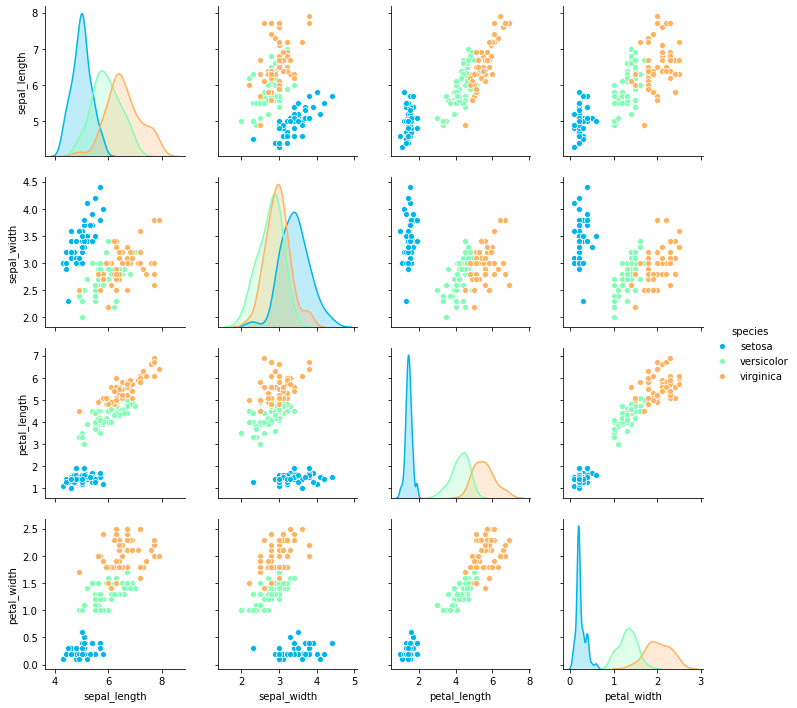

In [34]:
sns.pairplot(iris,hue='species',palette='rainbow')

In [53]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


# Train Test Split
Let's split up the data into a training set and a test set!

In [82]:
from sklearn.model_selection import train_test_split

In [111]:
X_iris = iris.drop('species', axis=1)
X_iris.shape


(150, 4)

In [112]:
y_iris = iris['species']
y_iris.shape

(150,)

In [113]:
X = X_iris
y = y_iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Decision Trees
We'll start just by training a single decision tree.

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtree = DecisionTreeClassifier()

In [116]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Prediction and Evaluation
Let's evaluate our decision tree.
Create predictions from the test set and create a classification report and a confusion matrix.

In [117]:
predictions = dtree.predict(X_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [120]:
print(confusion_matrix(y_test,predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Tree Visualization
Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [124]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(iris.columns[1:])
features

['sepal_width', 'petal_length', 'petal_width', 'species']

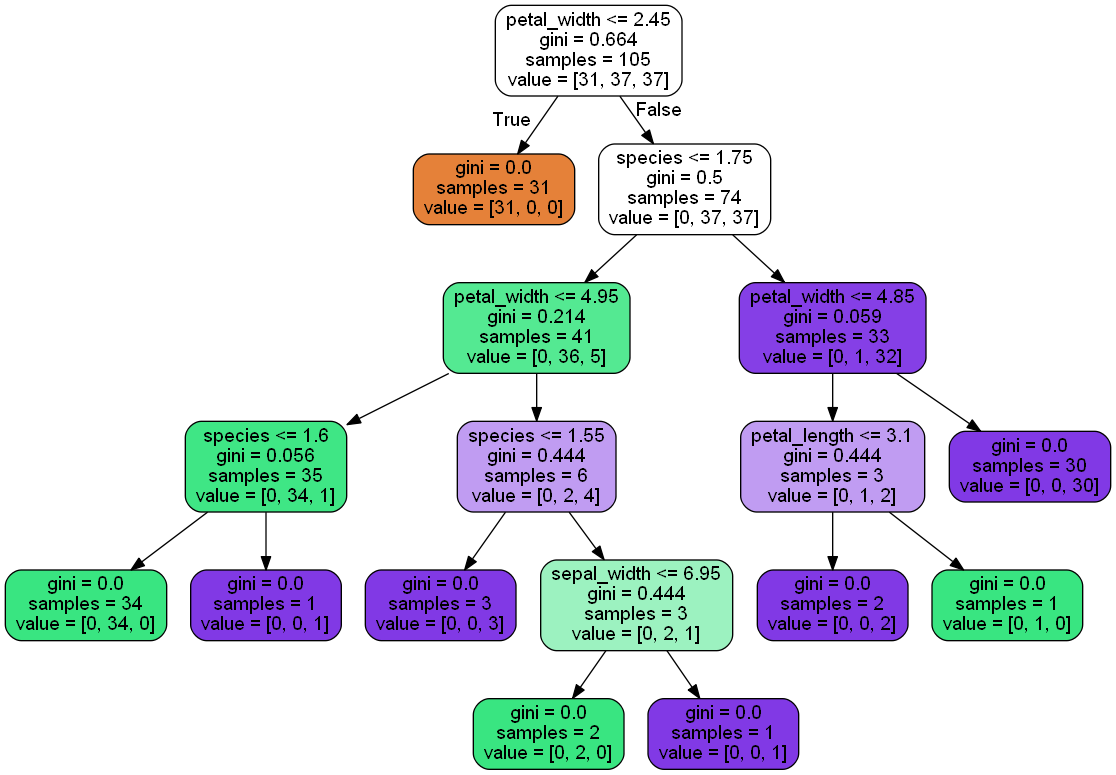

In [134]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# conclusion

Visualized tree with 100 percentage accuracy